<a href="https://colab.research.google.com/github/axlaalq/Renta-de-carros/blob/main/uber_renta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reestableciendo entorno para cálculo y gráficos

import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
costo_auto = 140000  # Precio en pesos MXN
depreciacion_anual = 0.18  # Devaluación anual (18%)
renta_semanal = 2700  # Renta semanal en pesos MXN
semanas_anuales = 52  # Semanas en un año
kilometraje_anual = 65000  # Kilometraje promedio anual de un Uber en México
meses_anuales = 12  # Meses en un año
kilometraje_mensual = kilometraje_anual / meses_anuales  # Kilometraje promedio mensual

# Función para calcular la devaluación en función del kilometraje
class valor_auto():
  def __init__(self, valor_inicial):
    self.valor_inicial = valor_inicial
  def valor_con_devalucaión(self, meses): # Added self as the first argument
      self.kilometraje_total = meses * kilometraje_mensual
      return self.valor_inicial * (1 - depreciacion_anual) ** (meses/12)
  def kilometraje(self,meses):
    return meses * kilometraje_mensual

valor_auto0 = valor_auto(140000)
valor_auto0.kilometraje(30)

162500.0

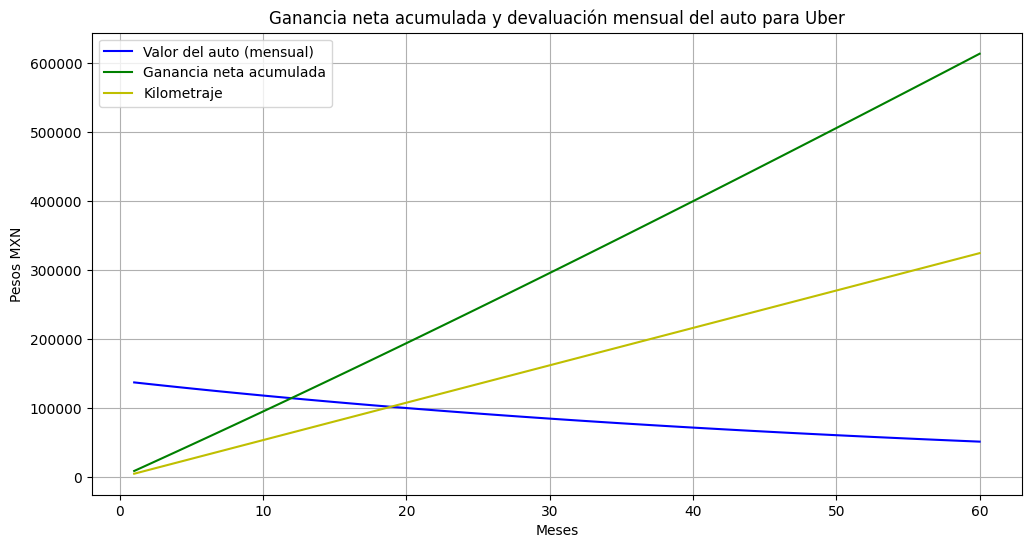

(613903.578048, 51903.57804800002)

In [ ]:
# Datos para graficar
seguro_anual = 15000  # Promedio entre $8,639 y $26,072 MXN
tenencia_anual = 1337  # Tenencia y refrendo anual en Querétaro
mantenimiento_anual = 26000  # Promedio entre $13,000 y $39,000 MXN
otros_gastos_anuales = 10000  # Fondo de contingencia
gastos_anuales_fijos = seguro_anual + tenencia_anual + mantenimiento_anual + otros_gastos_anuales
gasto_promedio_mensual = gastos_anuales_fijos/12
meses = np.arange(1, 61)  # Hasta 5 años (60 meses)
valores_mensuales = [valor_auto0.valor_con_devalucaión(m) for m in meses]
ingresos_mensuales = renta_semanal * (semanas_anuales / 12)  # Renta mensual promedio
ganancias_acumuladas = np.cumsum([ingresos_mensuales] * len(meses))  # Acumulación de ingresos
ganancias_netas_mensuales = ganancias_acumuladas - (costo_auto - np.array(valores_mensuales))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(meses, valores_mensuales, label="Valor del auto (mensual)", color="blue")
plt.plot(meses, ganancias_netas_mensuales, label="Ganancia neta acumulada", color="green")
plt.plot(meses, [valor_auto0.kilometraje(m) for m in meses], label="Kilometraje", color="y")
plt.title("Ganancia neta acumulada y devaluación mensual del auto para Uber")
plt.xlabel("Meses")
plt.ylabel("Pesos MXN")
plt.legend()
plt.grid(True)
plt.show()

ganancias_netas_mensuales[-1], valores_mensuales[-1]  # Ganancia neta acumulada final y valor del auto al final de 5 años
